### Titanic Survival Prediction using Logistic Regression

### Name: Aarushi Bose
### Roll_no: 21102A0034
### Github_Link:https://github.com/AarushiBose/MachineLearning_SemVII_Experiments_21102A0034/tree/main/Titanic_Survival_Prediction_Logistic_Regression

#### Import necessary libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load and Explore the Data

In [239]:
df = pd.read_csv('titanic/train.csv')

In [240]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
df.shape

(891, 12)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [243]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data Preprocessing

In [244]:
df = df.drop(columns='Cabin',axis=1)

In [245]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [246]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [247]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [248]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [249]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [250]:
# df1 = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)


In [251]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,False,True,True,False,False


In [252]:
df1 = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

In [253]:
df1 = df1.astype(int)
df1

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1
1,1,38,1,0,71,1,0,1,0,0
2,3,26,0,0,7,1,0,0,0,1
3,1,35,1,0,53,1,0,0,0,1
4,3,35,0,0,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,1,0,0,1
887,1,19,0,0,30,1,0,0,0,1
888,3,29,1,2,23,1,0,0,0,1
889,1,26,0,0,30,0,1,1,0,0


#### Define Features and Target Variable


In [254]:
X = df1
Y = df['Survived']

In [255]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1
1,1,38,1,0,71,1,0,1,0,0
2,3,26,0,0,7,1,0,0,0,1
3,1,35,1,0,53,1,0,0,0,1
4,3,35,0,0,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,0,1,0,0,1
887,1,19,0,0,30,1,0,0,0,1
888,3,29,1,2,23,1,0,0,0,1
889,1,26,0,0,30,0,1,1,0,0


In [256]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Split the Data

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [258]:
print(X.shape, X_train.shape, X_test.shape)

(891, 10) (712, 10) (179, 10)


####  Build and Train the Model

In [259]:
model = LogisticRegression()

In [260]:
model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Make Predictions

In [261]:
X_test_prediction = model.predict(X_test)

In [262]:
X_test_prediction 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

#### Evaluate the Model


In [263]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7877094972067039


In [264]:
cm = confusion_matrix(Y_test, X_test_prediction)
print(cm)

[[90 10]
 [28 51]]


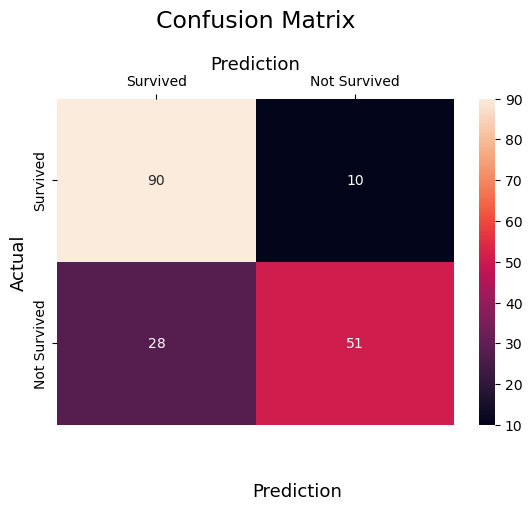

In [265]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [270]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.84      0.65      0.73        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179



#### Conclusion

In [271]:
model.coef_

array([[-1.0072219 , -0.04037521, -0.35627432, -0.03704489,  0.00264481,
         2.22396833, -0.4997293 ,  0.8021065 ,  0.59088707,  0.33124546]])

#### The most influential features in the model, as indicated by the largest absolute values of the coefficients, are `Sex_female` (2.224) which positively impacts the likelihood of the positive class, and `Pclass` (-1.007) which negatively impacts it.

### Model Performance and Improvements

1. **Model Performance**:
   - The logistic regression model achieved an accuracy of 78.77%, correctly predicting outcomes 79% of the time. However, the confusion matrix shows 28 false negatives and 10 false positives, indicating difficulties in correctly distinguishing between classes.

2. **Potential Improvements**:
   - **Class Imbalance**: Use techniques like SMOTE or adjust class weights to address the imbalance and reduce false negatives.
   - **Feature Engineering**: Enhance model performance by refining features, adding interaction terms, or selecting more relevant features.
   - **Hyperparameter Tuning**: Optimize model parameters using grid search or randomized search to improve accuracy and reduce misclassifications.